<a href="https://colab.research.google.com/github/stevecwb/Projet-Informatique/blob/main/Projet_Informatique_Graphiques.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bibliothèques & Fonctions



In [18]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import r2_score, mean_squared_error

In [19]:
def central_diferentiation(table):
  diff = []
  for i in range(len(table)):
    if i == 0:
      diff.append(0)
    elif i == len(table)-1:
      diff.append(0)
    else:
      d = (table[i+1]-table[i-1])/(2*0.1)
      diff.append(d)
  return diff

# 1 Dimension

## Lecture des données depuis GitHub

In [20]:
url = 'https://raw.githubusercontent.com/stevecwb/Projet-Informatique/main/Annexes/Solution_Analytique_1D.csv'
df_1D = pd.read_csv(url)
df_1D.rename(columns={list(df_1D)[0]:"Temperature", list(df_1D)[1]:"Energy", list(df_1D)[2]:"Cv"}, inplace = True)
df_1D

url = 'https://raw.githubusercontent.com/stevecwb/Projet-Informatique/main/Annexes/Solution_Numerique_1D.csv'
df_1D1 = pd.read_csv(url)
df_1D1.rename(columns={list(df_1D1)[0]:"Temperature", list(df_1D1)[1]:"Energy Numerical", list(df_1D1)[2]:"Cv Numerical"}, inplace = True)
df_1D1

df_1D['Energy Numerical'] = df_1D1['Energy Numerical']
df_1D['Cv Numerical'] = df_1D1['Cv Numerical']
df_1D['Cv Numerical Df'] = central_diferentiation(df_1D['Energy Numerical'].tolist())

df_1D

,Temperature,Energy,Cv,Energy Numerical,Cv Numerical,Cv Numerical Df
0,0.1,-1.000000,0.000001,-0.962177,150.606763,0.000000
1,0.2,-0.999909,0.004540,-0.954910,24.379511,0.041625
2,0.3,-0.997458,0.056418,-0.953852,13.303451,-0.038650
3,0.4,-0.986614,0.166201,-0.962640,8.440281,0.053250
4,0.5,-0.964028,0.282603,-0.943202,4.373678,0.238005
...,...,...,...,...,...,...
95,9.6,-0.103792,0.010734,-0.102425,0.010421,0.012040
96,9.7,-0.102729,0.010516,-0.105043,0.010706,-0.008350
97,9.8,-0.101688,0.010305,-0.104095,0.010232,0.025830
98,9.9,-0.100668,0.010100,-0.099877,0.010787,0.014415


 ## Tracé des graphiques d'énergie par rapport à la température

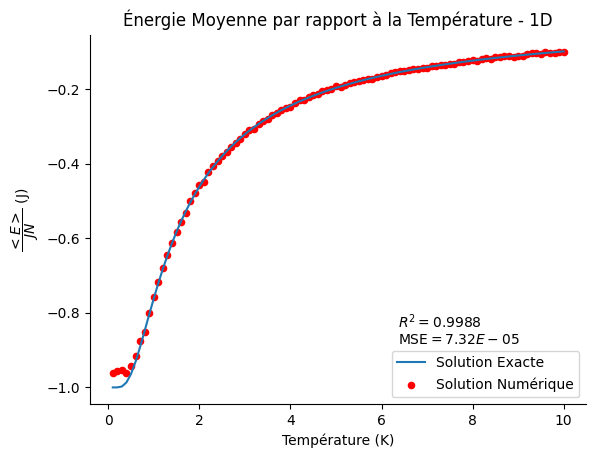

In [21]:
x = df_1D['Temperature']
y = df_1D['Energy']
y_numerical = df_1D['Energy Numerical']
ax = plt.subplot(111)
ax.plot(x, y, label = "Solution Exacte")
ax.scatter(x,y_numerical, c="red", label="Solution Numérique", s = 20*2**0)
ax.set_xlabel('Température (K)')
ax.set_ylabel('$\dfrac{<E>}{JN}$ (J)')
ax.set_title("Énergie Moyenne par rapport à la Température - 1D")
ax.legend(loc="lower right")

r2 = r2_score(df_1D['Energy'], df_1D['Energy Numerical'])
mse = mean_squared_error(df_1D['Energy'], df_1D['Energy Numerical'])

# Hide the right and top spines
ax.spines[['right', 'top']].set_visible(False)
textstr = '\n'.join((
    r'$R^2=%.4f$' % (r2, ),
    r'$\mathrm{MSE}=%.2E$' % (mse, )))
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
ax.text(0.62, 0.25, textstr, transform=ax.transAxes, fontsize=10,
        verticalalignment='top')

plt.savefig("1D Energy.svg", format="svg")
plt.show()

## Tracé de Cv par rapport à la température

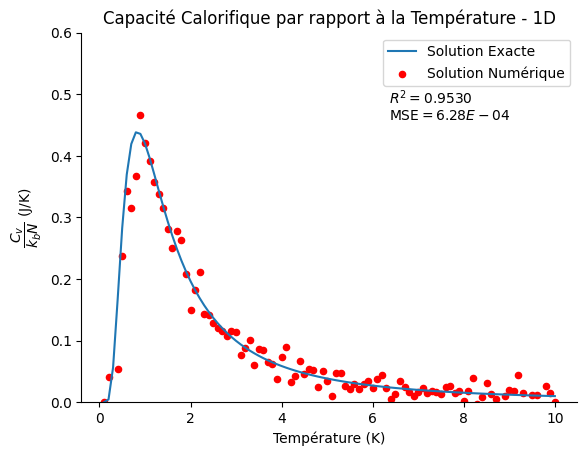

In [22]:
x = df_1D['Temperature']
y = df_1D['Cv']
r2 = r2_score(df_1D['Cv'], df_1D['Cv Numerical Df'])
mse = mean_squared_error(df_1D['Cv'], df_1D['Cv Numerical Df'])
y_numerical = df_1D['Cv Numerical Df']
ax = plt.subplot(111)
ax.plot(x, y, label = "Solution Exacte")
ax.scatter(x,y_numerical, c="red", label="Solution Numérique", s = 20*2**0)
ax.set_xlabel('Température (K)')
ax.set_ylabel('$\dfrac{C_v}{k_bN}$ (J/K)')
ax.set_title("Capacité Calorifique par rapport à la Température - 1D")
ax.legend(loc="upper right")
ax.set_ylim(0, 0.6)

# Hide the right and top spines
ax.spines[['right', 'top']].set_visible(False)

textstr = '\n'.join((
    r'$R^2=%.4f$' % (r2, ),
    r'$\mathrm{MSE}=%.2E$' % (mse, )))
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
ax.text(0.62, 0.85, textstr, transform=ax.transAxes, fontsize=10,
        verticalalignment='top')

plt.savefig("1D CV.svg", format="svg")

plt.show()

## Comparaison de Cv avec l'équation

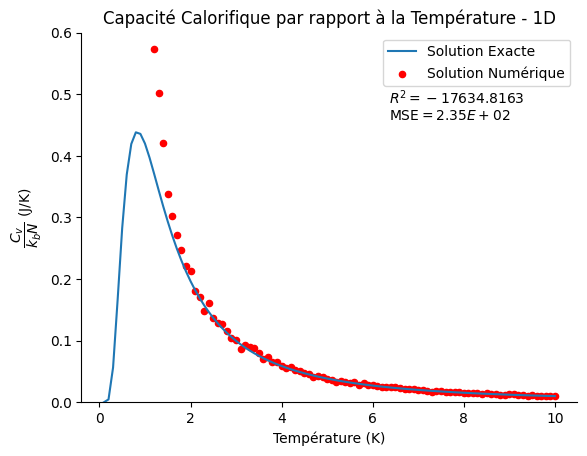

In [23]:
x = df_1D['Temperature']
y = df_1D['Cv']
r2 = r2_score(df_1D['Cv'], df_1D['Cv Numerical'])
mse = mean_squared_error(df_1D['Cv'], df_1D['Cv Numerical'])
y_numerical = df_1D['Cv Numerical']
ax = plt.subplot(111)
ax.plot(x, y, label = "Solution Exacte")
ax.scatter(x,y_numerical, c="red", label="Solution Numérique", s = 20*2**0)
ax.set_xlabel('Température (K)')
ax.set_ylabel('$\dfrac{C_v}{k_bN}$ (J/K)')
ax.set_title("Capacité Calorifique par rapport à la Température - 1D")
ax.legend(loc="upper right")
ax.set_ylim(0, 0.6)

# Hide the right and top spines
ax.spines[['right', 'top']].set_visible(False)

textstr = '\n'.join((
    r'$R^2=%.4f$' % (r2, ),
    r'$\mathrm{MSE}=%.2E$' % (mse, )))
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
ax.text(0.62, 0.85, textstr, transform=ax.transAxes, fontsize=10,
        verticalalignment='top')

plt.savefig("1D CV Wrong.svg", format="svg")

plt.show()

# 2 Dimension

## Lecture des données depuis GitHub

In [24]:
url = 'https://raw.githubusercontent.com/stevecwb/Projet-Informatique/main/Annexes/Solution_Analytique_2D.csv'
df_2D = pd.read_csv(url)
df_2D.rename(columns={list(df_2D)[0]:"Temperature", list(df_2D)[1]:"Energy", list(df_2D)[2]:"Cv", list(df_2D)[3]:"M"}, inplace = True)
df_2D

url = 'https://raw.githubusercontent.com/stevecwb/Projet-Informatique/main/Annexes/Solution_Numerique_2D.csv'
df_2D1 = pd.read_csv(url)
df_2D1.rename(columns={list(df_2D1)[0]:"Temperature", list(df_2D1)[1]:"Energy Numerical", list(df_2D1)[2]:"Cv Numerical", list(df_2D1)[3]:"M Numerical"}, inplace = True)
df_2D1

df_2D['Energy Numerical'] = df_2D1['Energy Numerical']
df_2D['Cv Numerical'] = df_2D1['Cv Numerical']
df_2D['M Numerical'] = df_2D1['M Numerical']
df_2D['Cv Numerical Df'] = central_diferentiation(df_2D['Energy Numerical'].tolist())

df_2D

,Temperature,Energy,Cv,M,Energy Numerical,Cv Numerical,M Numerical,Cv Numerical Df
0,0.1,-2.000000,0.000000,1.0,-1.978802,441.257570,0.958011,0.000000
1,0.2,-2.000000,-0.000000,1.0,-1.979640,121.998399,0.968990,-0.013485
2,0.3,-2.000000,0.000000,1.0,-1.981499,46.838102,0.962641,-0.041745
3,0.4,-2.000000,0.000001,1.0,-1.987989,19.301131,0.985868,-0.017150
4,0.5,-1.999999,0.000029,1.0,-1.984929,15.155066,0.979080,0.001345
...,...,...,...,...,...,...,...,...
95,9.6,-0.212155,0.022907,0.0,-0.213719,0.023590,0.003388,0.008370
96,9.7,-0.209889,0.022413,0.0,-0.212004,0.022657,0.003966,0.035640
97,9.8,-0.207672,0.021934,0.0,-0.206591,0.022249,0.001042,0.022730
98,9.9,-0.205502,0.021471,0.0,-0.207458,0.021849,0.000532,0.018865


## Tracé des graphiques d'énergie par rapport à la température

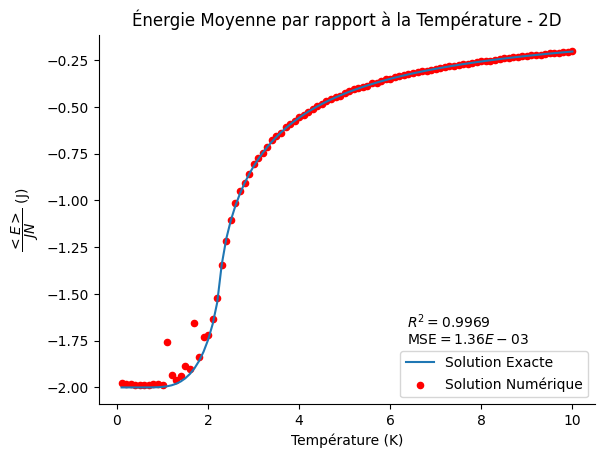

In [25]:
from matplotlib import pyplot as plt
x = df_2D['Temperature']
y = df_2D['Energy']
y_numerical = df_2D['Energy Numerical']
ax = plt.subplot(111)
ax.plot(x, y, label = "Solution Exacte")
ax.scatter(x,y_numerical, c="red", label="Solution Numérique", s = 20*2**0)
ax.set_xlabel('Température (K)')
ax.set_ylabel('$\dfrac{<E>}{JN}$ (J)')
ax.set_title("Énergie Moyenne par rapport à la Température - 2D")
ax.legend(loc="lower right")

r2 = r2_score(df_2D['Energy'], df_2D['Energy Numerical'])
mse = mean_squared_error(df_2D['Energy'], df_2D['Energy Numerical'])

# Hide the right and top spines
ax.spines[['right', 'top']].set_visible(False)
textstr = '\n'.join((
    r'$R^2=%.4f$' % (r2, ),
    r'$\mathrm{MSE}=%.2E$' % (mse, )))
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
ax.text(0.62, 0.25, textstr, transform=ax.transAxes, fontsize=10,
        verticalalignment='top')

plt.savefig("2D Energy.svg", format="svg")
plt.show()

## Tracé de Cv par rapport à la température

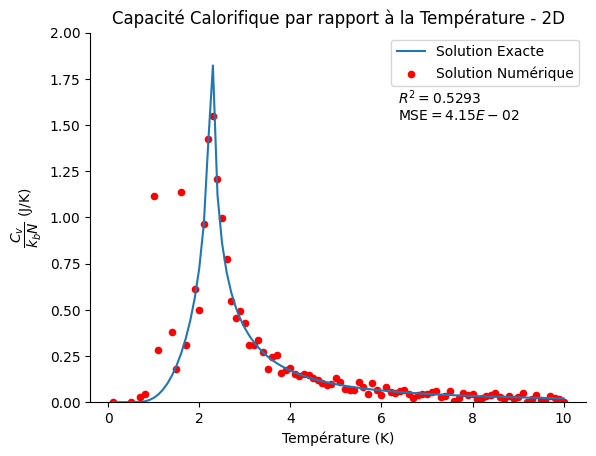

In [26]:
from matplotlib import pyplot as plt
x = df_2D['Temperature']
y = df_2D['Cv']
r2 = r2_score(df_2D['Cv'], df_2D['Cv Numerical Df'])
mse = mean_squared_error(df_2D['Cv'], df_2D['Cv Numerical Df'])
y_numerical = df_2D['Cv Numerical Df']
ax = plt.subplot(111)
ax.plot(x, y, label = "Solution Exacte")
ax.scatter(x,y_numerical, c="red", label="Solution Numérique", s = 20*2**0)
ax.set_xlabel('Température (K)')
ax.set_ylabel('$\dfrac{C_v}{k_bN}$ (J/K)')
ax.set_title("Capacité Calorifique par rapport à la Température - 2D")
ax.legend(loc="upper right")
ax.set_ylim(0, 2)

# Hide the right and top spines
ax.spines[['right', 'top']].set_visible(False)

textstr = '\n'.join((
    r'$R^2=%.4f$' % (r2, ),
    r'$\mathrm{MSE}=%.2E$' % (mse, )))
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
ax.text(0.62, 0.85, textstr, transform=ax.transAxes, fontsize=10,
        verticalalignment='top')

plt.savefig("2D CV.svg", format="svg")

plt.show()

## Tracé de l'aimantation par rapport à la température

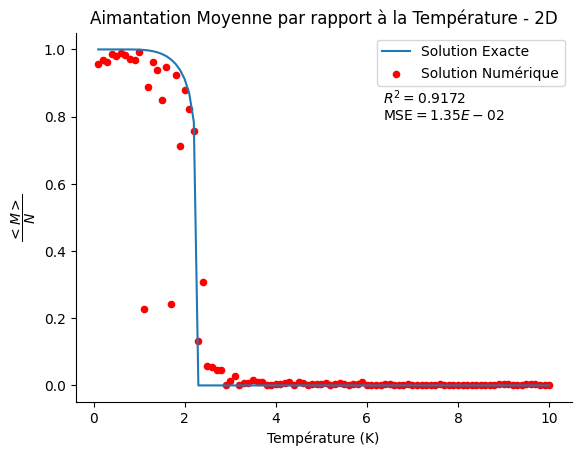

In [27]:
from matplotlib import pyplot as plt
x = df_2D['Temperature']
y = df_2D['M']
y_numerical = df_2D['M Numerical']
ax = plt.subplot(111)
ax.plot(x, y, label = "Solution Exacte")
ax.scatter(x,y_numerical, c="red", label="Solution Numérique", s = 20*2**0)
ax.set_xlabel('Température (K)')
ax.set_ylabel('$\dfrac{<M>}{N}$')
ax.set_title("Aimantation Moyenne par rapport à la Température - 2D")
ax.legend(loc="upper right")

r2 = r2_score(df_2D['M'], df_2D['M Numerical'])
mse = mean_squared_error(df_2D['M'], df_2D['M Numerical'])

# Hide the right and top spines
ax.spines[['right', 'top']].set_visible(False)
textstr = '\n'.join((
    r'$R^2=%.4f$' % (r2, ),
    r'$\mathrm{MSE}=%.2E$' % (mse, )))
props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
ax.text(0.62, 0.85, textstr, transform=ax.transAxes, fontsize=10,
        verticalalignment='top')

plt.savefig("2D M.svg", format="svg")
plt.show()

# 3 Dimension

## Lecture des données depuis GitHub

In [28]:
url = 'https://raw.githubusercontent.com/stevecwb/Projet-Informatique/main/Annexes/Solution_Numerique_3D.csv'
df_3D = pd.read_csv(url)
df_3D.rename(columns={list(df_3D)[0]:"Temperature", list(df_3D)[1]:"Energy Numerical", list(df_3D)[2]:"Cv Numerical", list(df_3D)[3]:"M Numerical"}, inplace = True)
df_3D

df_3D['Cv Numerical Df'] = central_diferentiation(df_3D['Energy Numerical'].tolist())

df_3D

,Temperature,Energy Numerical,Cv Numerical,M Numerical,Cv Numerical Df
0,0.1,-2.451207,218.361717,0.424587,0.000000
1,0.2,-2.396437,44.808333,0.159648,-0.130295
2,0.3,-2.477266,15.898066,0.396840,-0.371935
3,0.4,-2.470824,15.555601,0.331237,-2.547385
4,0.5,-2.986743,14.914820,0.993993,-0.148630
...,...,...,...,...,...
95,9.6,-0.326896,0.036369,0.000906,0.079030
96,9.7,-0.318589,0.035010,0.003269,0.049755
97,9.8,-0.316945,0.035982,0.002227,0.000320
98,9.9,-0.318525,0.035623,0.000342,0.008725


## Tracé d'énergie par rapport à la température

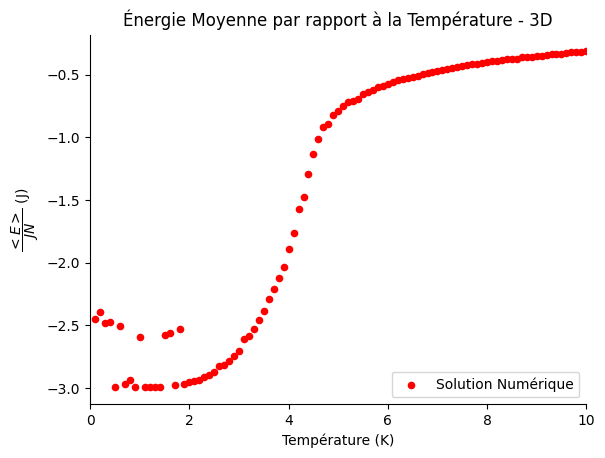

In [29]:
from matplotlib import pyplot as plt
x = df_3D['Temperature']
y_numerical = df_3D['Energy Numerical']
ax = plt.subplot(111)
ax.scatter(x,y_numerical, c="red", label="Solution Numérique", s = 20*2**0)
ax.set_xlabel('Température (K)')
ax.set_ylabel('$\dfrac{<E>}{JN}$ (J)')
ax.set_title("Énergie Moyenne par rapport à la Température - 3D")
ax.legend(loc="lower right")
ax.set_xlim(0, 10)


# Hide the right and top spines
ax.spines[['right', 'top']].set_visible(False)

plt.savefig("3D Energy.svg", format="svg")
plt.show()

## Tracé de Cv par rapport à la température

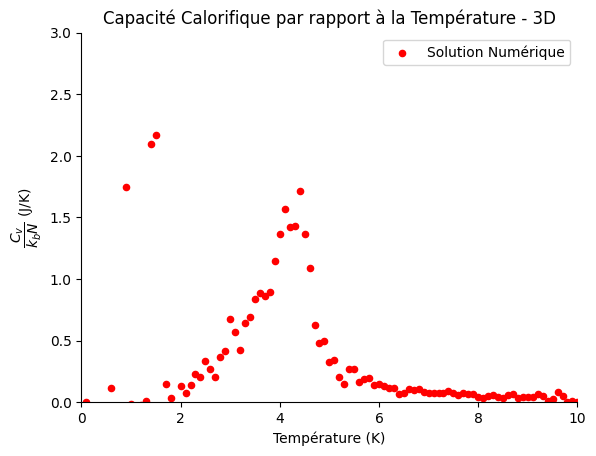

In [30]:
from matplotlib import pyplot as plt
x = df_3D['Temperature']
y_numerical = df_3D['Cv Numerical Df']
ax = plt.subplot(111)
ax.scatter(x,y_numerical, c="red", label="Solution Numérique", s = 20*2**0)
ax.set_xlabel('Température (K)')
ax.set_ylabel('$\dfrac{C_v}{k_bN}$ (J/K)')
ax.set_title("Capacité Calorifique par rapport à la Température - 3D")
ax.legend(loc="upper right")
ax.set_xlim(0, 10)
ax.set_ylim(0, 3)

# Hide the right and top spines
ax.spines[['right', 'top']].set_visible(False)


plt.savefig("3D CV.svg", format="svg")

plt.show()

## Tracé de l'aimantation par rapport à la température

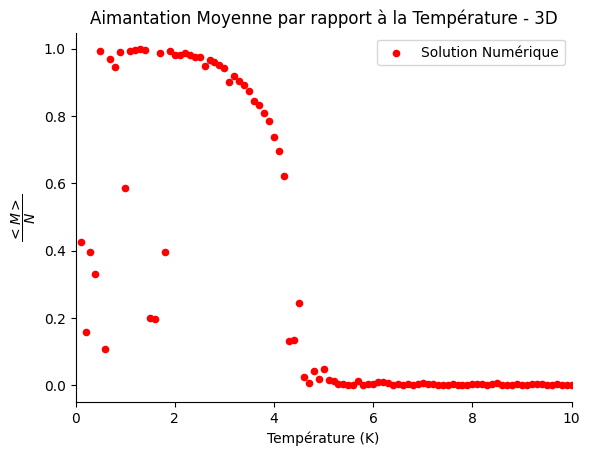

In [31]:
from matplotlib import pyplot as plt
x = df_3D['Temperature']
y_numerical = df_3D['M Numerical']
ax = plt.subplot(111)
ax.scatter(x,y_numerical, c="red", label="Solution Numérique", s = 20*2**0)
ax.set_xlabel('Température (K)')
ax.set_ylabel('$\dfrac{<M>}{N}$')
ax.set_title("Aimantation Moyenne par rapport à la Température - 3D")
ax.legend(loc="upper right")
ax.set_xlim(0, 10)


# Hide the right and top spines
ax.spines[['right', 'top']].set_visible(False)


plt.savefig("3D M.svg", format="svg")
plt.show()

# Comparaison

## Graphique comparatif de l'énergie par rapport à la température pour chaque dimension

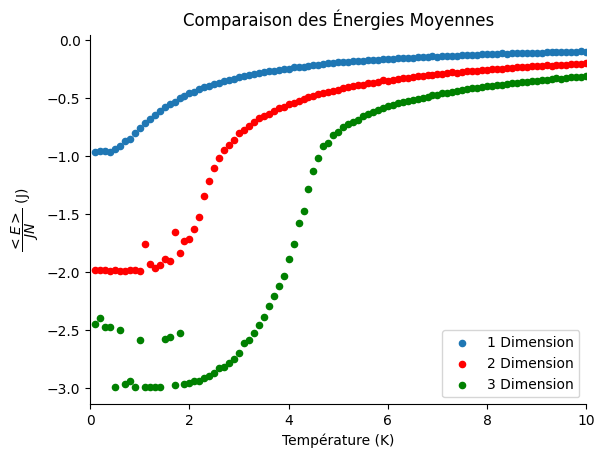

In [32]:
from matplotlib import pyplot as plt
x = df_2D['Temperature']
x_3D = df_3D['Temperature']
y_1D = df_1D['Energy Numerical']
y_2D = df_2D['Energy Numerical']
y_3D = df_3D['Energy Numerical']
ax = plt.subplot(111)
ax.scatter(x, y_1D, label = "1 Dimension", s = 20*2**0)
ax.scatter(x, y_2D, c="red", label="2 Dimension", s = 20*2**0)
ax.scatter(x_3D, y_3D, c="green", label="3 Dimension", s = 20*2**0)
ax.set_xlabel('Température (K)')
ax.set_ylabel('$\dfrac{<E>}{JN}$ (J)')
ax.set_title("Comparaison des Énergies Moyennes")
ax.legend(loc="lower right")
ax.set_xlim(0, 10)


# Hide the right and top spines
ax.spines[['right', 'top']].set_visible(False)


plt.savefig("Energy Comparaison.svg", format="svg")
plt.show()

## Graphique comparatif de Cv par rapport à la température pour chaque dimension

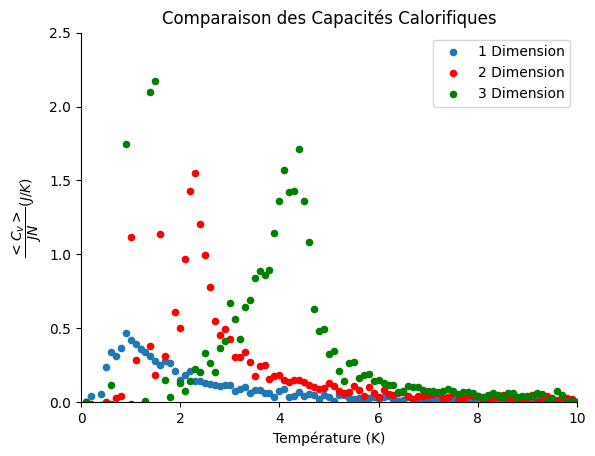

In [33]:
from matplotlib import pyplot as plt
x = df_2D['Temperature']
x_3D = df_3D['Temperature']
y_1D = df_1D['Cv Numerical Df']
y_2D = df_2D['Cv Numerical Df']
y_3D = df_3D['Cv Numerical Df']
ax = plt.subplot(111)
ax.scatter(x, y_1D, label = "1 Dimension", s = 20*2**0)
ax.scatter(x, y_2D, c="red", label="2 Dimension", s = 20*2**0)
ax.scatter(x_3D, y_3D, c="green", label="3 Dimension", s = 20*2**0)
ax.set_xlabel('Température (K)')
ax.set_ylabel('$\dfrac{<C_v>}{JN} (J/K)$')
ax.set_title("Comparaison des Capacités Calorifiques")
ax.legend(loc="upper right")
ax.set_xlim(0, 10)
ax.set_ylim(0, 2.5)


# Hide the right and top spines
ax.spines[['right', 'top']].set_visible(False)


plt.savefig("Cv Comparaison.svg", format="svg")
plt.show()

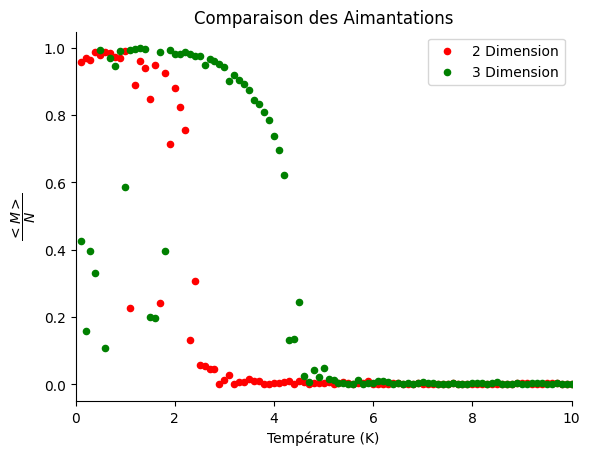

In [34]:
from matplotlib import pyplot as plt
x = df_2D['Temperature']
x_3D = df_3D['Temperature']
y_2D = df_2D['M Numerical']
y_3D = df_3D['M Numerical']
ax = plt.subplot(111)
ax.scatter(x, y_2D, c="red", label="2 Dimension", s = 20*2**0)
ax.scatter(x_3D, y_3D, c="green", label="3 Dimension", s = 20*2**0)
ax.set_xlabel('Température (K)')
ax.set_ylabel('$\dfrac{<M>}{N}$')
ax.set_title("Comparaison des Aimantations")
ax.legend(loc="upper right")
ax.set_xlim(0, 10)


# Hide the right and top spines
ax.spines[['right', 'top']].set_visible(False)


plt.savefig("Cv Comparaison.svg", format="svg")
plt.show()